--Charger & vérifier le dataset--

--Nettoyage léger / cohérence--

--Statistiques descriptives globales et par label--

--Distribution des features + graphiques (hist, box/violin, hexbin)--

--Corrélations et pairwise plots--

Analyse de motifs/textes (fréquences, substrings, dates, sequences)

Tests statistiques (t-test / KS) pour features entre classes

Sauvegarde des résumés et des figures

# Analyse statistique du dataset de mots de passe

## 1. Chargement du dataset
- Import du fichier `passwords_processed.csv`
- Aperçu initial (head)

In [41]:
import pandas as pd
from IPython.display import display

df = pd.read_csv("../processed/passwords_processed.csv")
df.head()

,password,label,length_norm,diversity,entropy
0,GkADaiojURMQzIBQ,1,0.80,0.50,0.912070
1,b03p17,0,0.30,0.50,0.310196
2,witwicky,0,0.40,0.25,0.376035
3,914537650,0,0.45,0.25,0.298974
4,m`1^+ax-r72vp1M,1,0.75,1.00,0.983188


## 2. Vérifications préliminaires
- Structure du dataframe (`df.info()`)
- Valeurs manquantes
- Doublons
- Vérification manuelle des anomalies potentielles

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19998 entries, 0 to 19997
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   password     19998 non-null  object 
 1   label        19998 non-null  int64  
 2   length_norm  19998 non-null  float64
 3   diversity    19998 non-null  float64
 4   entropy      19998 non-null  float64
dtypes: float64(3), int64(1), object(1)
memory usage: 781.3+ KB


In [43]:
df.isna().sum()

password       0
label          0
length_norm    0
diversity      0
entropy        0
dtype: int64

In [44]:
df.duplicated().sum()

np.int64(0)

In [45]:
df[df.duplicated()]

,password,label,length_norm,diversity,entropy



## 3. Statistiques descriptives globales
- `df.describe()`
- Répartition des classes (`df['label'].value_counts()`)
- Analyse des résultats

In [46]:
df.describe()

df['label'].value_counts()

label
1    10000
0     9998
Name: count, dtype: int64

## 4. Statistiques descriptives par classe
- Describe groupé par label
- Moyenne, médiane, quantiles
- Analyse des résultats

In [47]:
display(df.groupby("label")[["length_norm"]].describe())
display(df.groupby("label")[["diversity"]].describe())
display(df.groupby("label")[["entropy"]].describe())

length_norm                                               
            count      mean       std  min   25%   50%  75%  max
label                                                           
0          9998.0  0.434267  0.116368  0.2  0.35  0.40  0.5  1.0
1         10000.0  0.749105  0.158769  0.5  0.60  0.75  0.9  1.0

diversity                                                
          count      mean       std   min   25%   50%  75%  max
label                                                          
0        9998.0  0.404456  0.153008  0.25  0.25  0.50  0.5  1.0
1       10000.0  0.822300  0.157877  0.50  0.75  0.75  1.0  1.0

entropy                                                              \
         count      mean       std       min       25%       50%       75%   
label                                                                        
0       9998.0  0.419660  0.137128  0.132877  0.329031  0.413594  0.486997   
1      10000.0  0.881688  0.135031  0.516993  0.767078  0.952671  1.000000   

            
       max  
label       
0      1.0  
1      1.0

In [48]:
df.groupby("label")[["length_norm", "diversity", "entropy"]].mean()

,length_norm,diversity,entropy
label,,,
0,0.434267,0.404456,0.419660
1,0.749105,0.822300,0.881688


In [49]:
df.groupby("label")[["length_norm", "diversity", "entropy"]].median()

,length_norm,diversity,entropy
label,,,
0,0.40,0.50,0.413594
1,0.75,0.75,0.952671


In [50]:
df[["length_norm", "diversity", "entropy"]].quantile([0.05, 0.25, 0.5, 0.75, 0.95])

,length_norm,diversity,entropy
0.05,0.30,0.25,0.265754
0.25,0.40,0.50,0.413594
0.50,0.55,0.50,0.639232
0.75,0.75,0.75,0.958848
0.95,0.95,1.00,1.000000


## 5. Visualisation des distributions

### 5.1 Histogrammes par feature
- Histogramme longueur normalisée
- Histogramme diversité
- Histogramme entropie
- Analyse des résultats

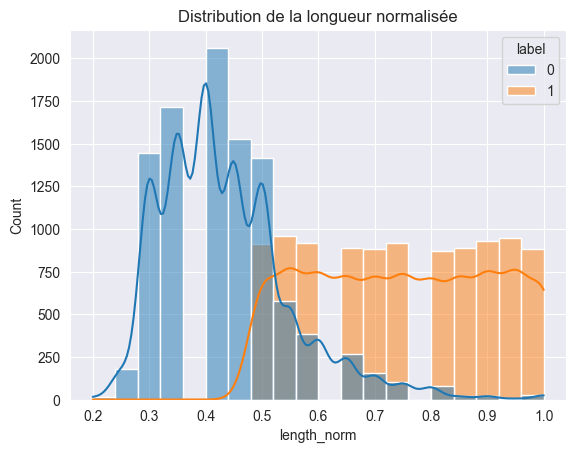

In [51]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df, x="length_norm", hue="label", bins=20, kde=True)
plt.title("Distribution de la longueur normalisée")
plt.show()

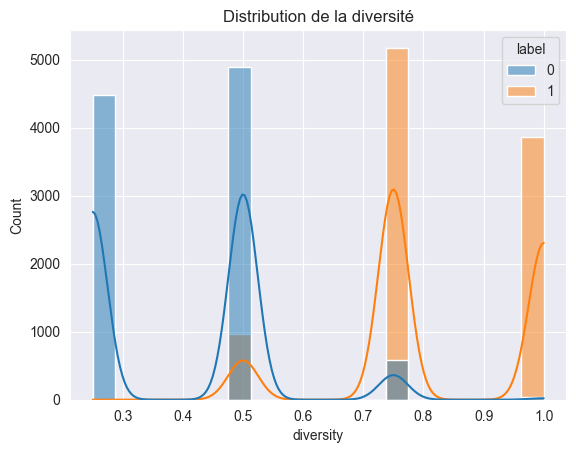

In [52]:
sns.histplot(df, x="diversity", hue="label", bins=20, kde=True)
plt.title("Distribution de la diversité")
plt.show()

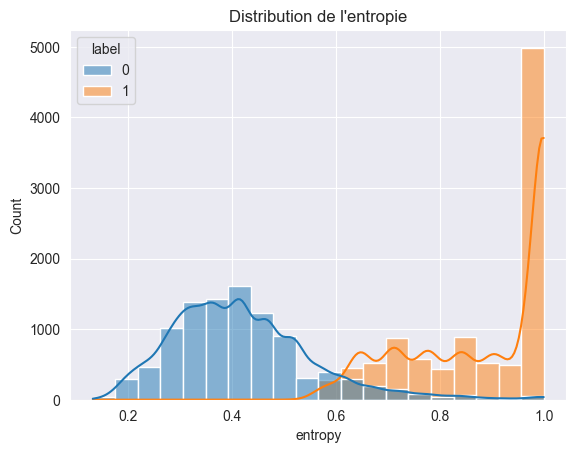

In [53]:
sns.histplot(df, x="entropy", hue="label", bins=20, kde=True)
plt.title("Distribution de l'entropie")
plt.show()

### 5.2 Boxplots 
- Boxplot diversité
- Analyse des résultats

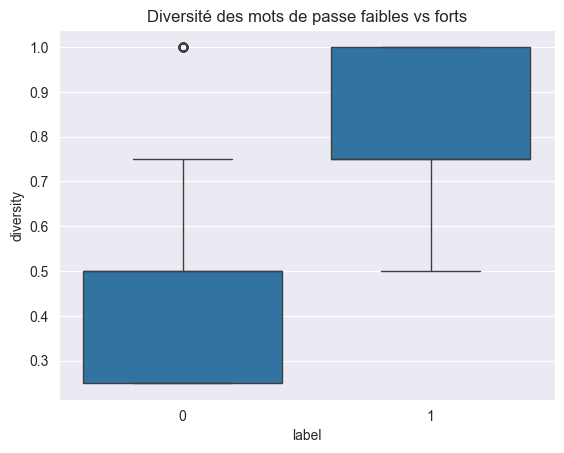

In [54]:
sns.boxplot(x="label", y="diversity", data=df)
plt.title("Diversité des mots de passe faibles vs forts")
plt.show()


## 6. Corrélations et relations entre features
- Matrice de corrélation + heatmap
- Hexbin : length_norm vs entropy
- Pairplot des features
- Analyse des résultats

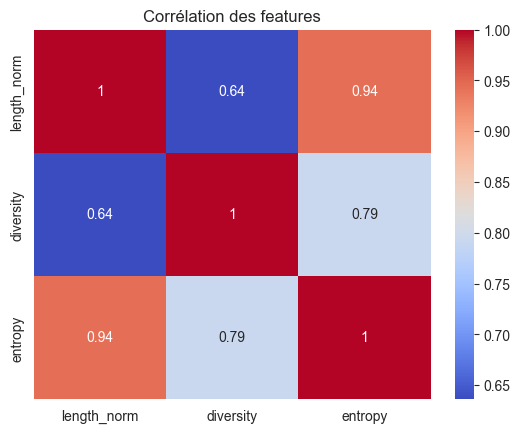

In [55]:
sns.heatmap(df[["length_norm", "diversity", "entropy"]].corr(), annot=True, cmap="coolwarm")
plt.title("Corrélation des features")
plt.show()

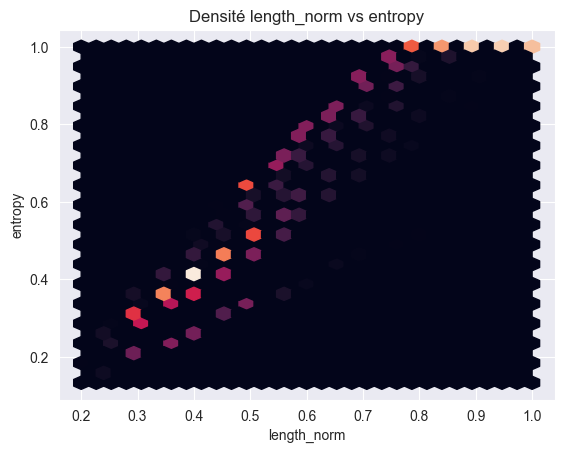

In [56]:
plt.hexbin(df["length_norm"], df["entropy"], gridsize=30)
plt.xlabel("length_norm")
plt.ylabel("entropy")
plt.title("Densité length_norm vs entropy")
plt.show()

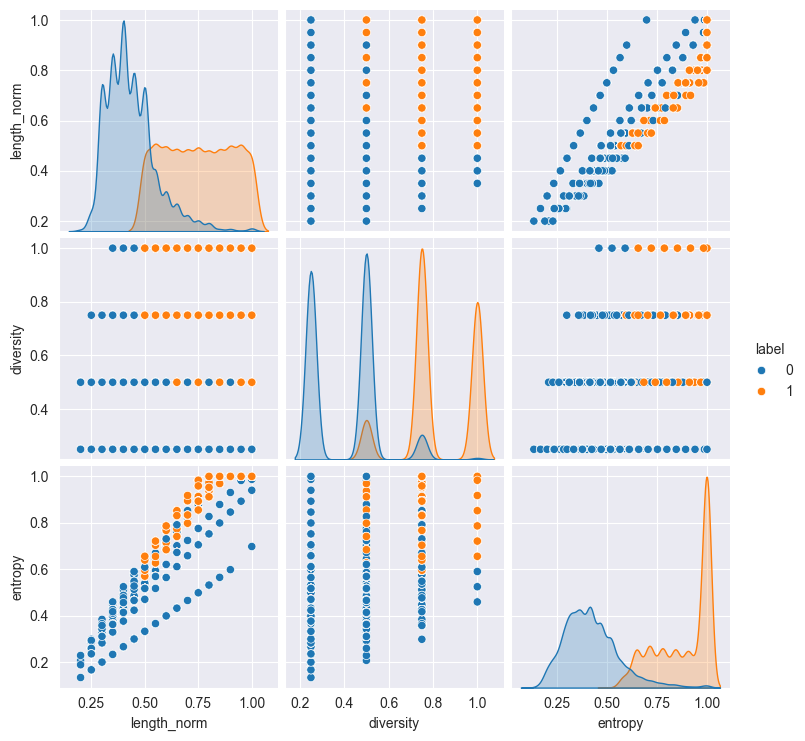

In [57]:
sns.pairplot(df[["length_norm", "diversity", "entropy", "label"]], hue="label")
plt.show()

## 7. Tests statistiques entre classes
- Mann–Whitney U test pour :
  - length_norm  
  - diversity  
  - entropy
- Analyse des résultats

In [58]:
from scipy.stats import mannwhitneyu

for col in ["length_norm", "diversity", "entropy"]:
    stat, p = mannwhitneyu(df[df.label==0][col], df[df.label==1][col], alternative="two-sided")
    print(col, p)

length_norm 0.0
diversity 0.0
entropy 0.0


## 8. Conclusion et interprétation
- Résumé global
- Importance relative des features
- Intuition pour la modélisation ML

Synthétiser :

tendances observées

ce qui distingue réellement les classes

ce que les tests stats confirment

ce que ça implique pour ton futur modèle ML

 vue d’ensemble,  pas répéter toute l’analyse déjà faite dans les sections précédentes